# Индивидуальное домашнее задание № 2 постатистическому анализу.
## Тема: "Классические методы математической статистики".
#### Выполнил студент гр. 9381 Семенов Александр, вариант 15.
## Задание:

![title](task.png)

## Выполнение работы
## 1 часть:
Для начала производится создание коллекции из данных (выборки):

In [146]:
data <- c(5,3,10,6,12,1,10,4,1,1,9,4,1,18,11,0,1,11,0,4,3,15,2,
6,0,12,11,0,4,15,3,1,3,2,5,3,2,17,1,0,3,0,4,8,0,1,3,3,0,9)
alpha_1 = 0.2
a = 0
b = 8.29
lambda_0 = 8
lambda_1 = 4

### а) Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.
Исходный ряд:

In [147]:
print(data)

 [1]  5  3 10  6 12  1 10  4  1  1  9  4  1 18 11  0  1 11  0  4  3 15  2  6  0
[26] 12 11  0  4 15  3  1  3  2  5  3  2 17  1  0  3  0  4  8  0  1  3  3  0  9


Вариационный ряд:

In [148]:
print(sort(data))

 [1]  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  3  3  3  3  3  3
[26]  3  3  4  4  4  4  4  5  5  6  6  8  9  9 10 10 11 11 11 12 12 15 15 17 18


Вектор рангов:

In [149]:
rankVector = rank(data)
print(rankVector)

 [1] 33.5 23.5 40.5 35.5 45.5 12.5 40.5 30.0 12.5 12.5 38.5 30.0 12.5 50.0 43.0
[16]  4.5 12.5 43.0  4.5 30.0 23.5 47.5 18.0 35.5  4.5 45.5 43.0  4.5 30.0 47.5
[31] 23.5 12.5 23.5 18.0 33.5 23.5 18.0 49.0 12.5  4.5 23.5  4.5 30.0 37.0  4.5
[46] 12.5 23.5 23.5  4.5 38.5


Ранжированный ряд в виде таблицы:

In [150]:
print(data.frame(Value = data, Rank = rankVector))

   Value Rank
1      5 33.5
2      3 23.5
3     10 40.5
4      6 35.5
5     12 45.5
6      1 12.5
7     10 40.5
8      4 30.0
9      1 12.5
10     1 12.5
11     9 38.5
12     4 30.0
13     1 12.5
14    18 50.0
15    11 43.0
16     0  4.5
17     1 12.5
18    11 43.0
19     0  4.5
20     4 30.0
21     3 23.5
22    15 47.5
23     2 18.0
24     6 35.5
25     0  4.5
26    12 45.5
27    11 43.0
28     0  4.5
29     4 30.0
30    15 47.5
31     3 23.5
32     1 12.5
33     3 23.5
34     2 18.0
35     5 33.5
36     3 23.5
37     2 18.0
38    17 49.0
39     1 12.5
40     0  4.5
41     3 23.5
42     0  4.5
43     4 30.0
44     8 37.0
45     0  4.5
46     1 12.5
47     3 23.5
48     3 23.5
49     0  4.5
50     9 38.5


Построение эмпирической функции распределения:

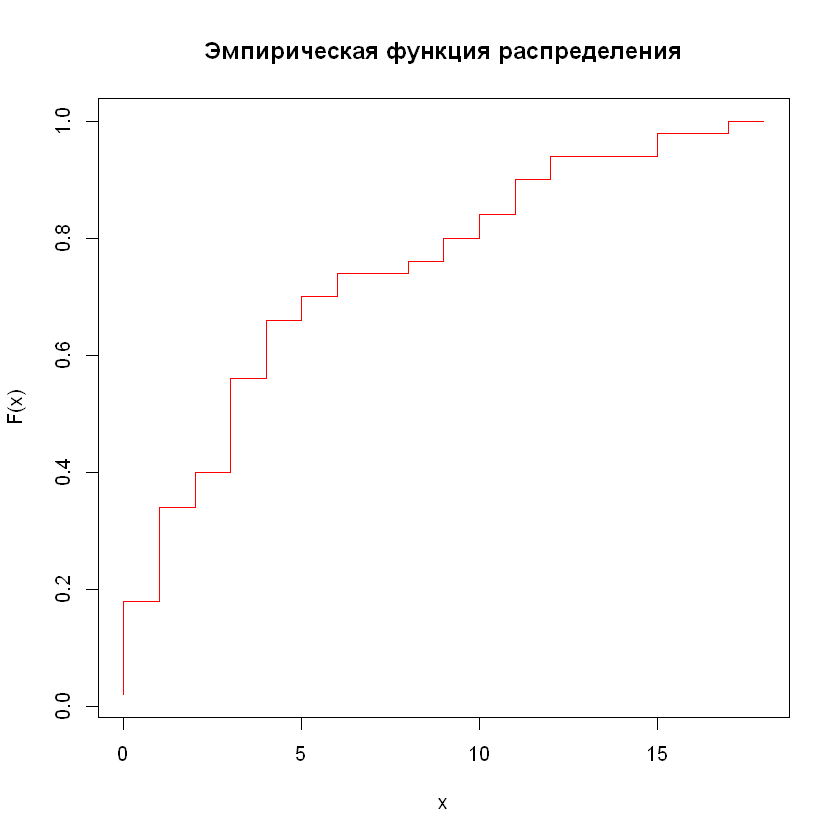

In [151]:
dataLen = length(data)
plot(sort(data), (1:dataLen)/dataLen, type="S", col="red", 
main="Эмпирическая функция распределения", xlab="x", ylab="F(x)")

Гистограмма частот:

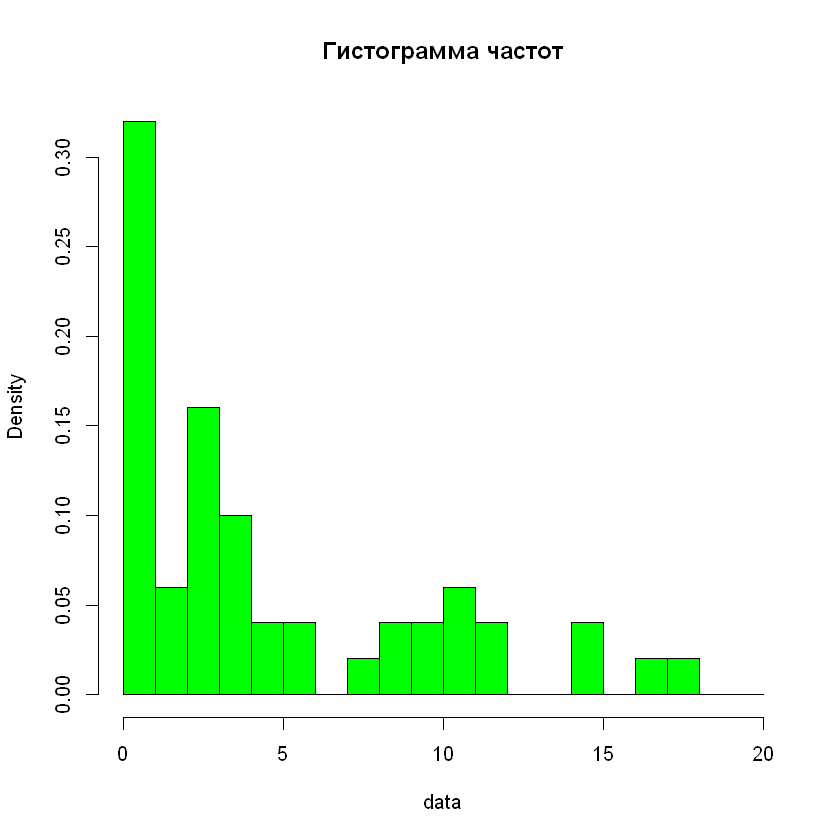

In [152]:
hist(data, breaks=0:20, main="Гистограмма частот", freq = FALSE, col = "green")

### b) Вычислить выборочные аналоги числовых характеристик (матожидание, дисперсия, медиана, ассиметрия, эксцесс, вероятности на промежутке).

In [153]:
#install.packages ("moments")
#library(moments)
print(data.frame(Матожидание = mean(data), Дисперсия = var(data), 
Медиана = median(data), Ассиметрия = skewness(data), Эксцесс = kurtosis(data)))

  Матожидание Дисперсия Медиана Ассиметрия  Эксцесс
1        4.96   24.5698       3   1.040773 3.043562


$P(X \in [a, b])=P(X \in [0, 8.29]):$

In [154]:
k = 0
for (value in data){
    if(value >=a && value <=b) 
        k = k + 1
}
print(k/dataLen)

[1] 0.74


### c) В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдоподобия параметра $\lambda$ а также оценку $\lambda$ по методу моментов. Найти смещение оценок.
Плотность распределения Пуассона: 
### $p(x) = \displaystyle{\frac{e^{-\lambda}\lambda^x}{x!}}$, $x \geqslant 0$

Функция правдоподобия: 
### $L(x,\lambda)=\displaystyle{\prod\limits_{i=1}^{n}\frac{e^{-\lambda}\lambda^x_i}{x_i!}=e^{-\lambda n}\lambda^{\sum_{i=1}^{n}x_i}\prod\limits_{i=1}^{n}\frac{1}{x_i!}}$
Логарифм от функции правдоподобия:
### $\displaystyle{LL(x,\lambda)=-\lambda n + \sum_{i=1}^{n}x_iln(\lambda)-ln(\prod\limits_{i=1}^{n}x_i!)}$
### $\displaystyle{\frac{\partial LL}{\partial\lambda}=-n+\frac{1}{\lambda}\sum_{i=1}^{n}x_i=0} \Longrightarrow \hat{\lambda} = \frac{1}{n}\sum_{i=1}^{n}x_i=\bar{x}=4,96$
По методу моментов оценим $\lambda$:
### $\displaystyle{E(\hat{\lambda})=E(\bar{x})=\frac{1}{n}E(\sum_{i=1}^{n}x_i)=\frac{1}{n}\sum_{i=1}^{n}E(x_i)=\frac{1}{n}n\lambda=\lambda}$
Найдем смещение оценок:
### $\displaystyle{E(\hat{\lambda})=\lambda\Longrightarrow\hat{\lambda}}$ - несмещенная оценка
Таким образом, оценка: $\displaystyle{\hat{\lambda}=4,96}$

### d) Построить асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе ОМП.
Воспользуемся центральной предельной теоремой:
### $\displaystyle{\sqrt n\frac{\bar x - a}{\sigma}\longrightarrow N(0, 1)}$
При этом:
### $\displaystyle{x_1, x_2, ..., x_n \sim Pois(\lambda)}$
Из чего следует, что:
### $\displaystyle{\hat{\lambda}=\bar x},EX_i=\lambda,DX_i=\lambda$
Тогда:
### $\displaystyle{\sqrt n\frac{\bar x - \lambda}{\sqrt{\hat\lambda}}\longrightarrow N(0, 1) \Longrightarrow \sqrt n\frac{\bar x - \lambda}{\sqrt{\bar x}}\longrightarrow N(0, 1) \Longrightarrow P\left(-x_\alpha \leqslant \sqrt n\frac{\bar x - \lambda}{\sqrt{\bar x}} \leqslant x_\alpha\right)\longrightarrow 1-\alpha_1}$
### где, $\displaystyle{x_\alpha: \Phi(x_\alpha)=1-\frac{\alpha_1}{2}=1-\frac{0,2}{2}=0,9}\Longrightarrow x_\alpha=\Phi^{-1}(0,9)=1,281552$

In [155]:
print(qnorm (0.9)) # Вычисление Ф^(-1)

[1] 1.281552


Тогда:
### $\displaystyle{P\left(-x_\alpha \leqslant \sqrt n\frac{\bar x - \lambda}{\sqrt{\bar x}} \leqslant x_\alpha\right)\longrightarrow 1-\alpha_1 \Longrightarrow P\left(\bar x-\frac{x_\alpha\sqrt{\bar x}}{\sqrt n} \leqslant \lambda \leqslant \bar x+\frac{x_\alpha\sqrt{\bar x}}{\sqrt n}\right)\longrightarrow 1-\alpha_1 \Longrightarrow P\left(4,96-\frac{1,281552\sqrt{4,96}}{\sqrt 50} \leqslant \lambda \leqslant 4,96+\frac{1,281552\sqrt{4,96}}{\sqrt 50}\right)\longrightarrow 1-0.2}$

In [156]:
4.96 - (1.281552*sqrt(4.96))/sqrt(50) # Расчеты

[1] 4.556362

In [157]:
4.96 + (1.281552*sqrt(4.96))/sqrt(50) # Расчеты

[1] 5.363638

Итого:
### $\displaystyle{P(4,56 \leqslant \lambda \leqslant 5,36)\longrightarrow 0,8}$

### e) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия я распределением Пуассона с параметром $\lambda_0$. Проверить гипотезу на уровне значимости $\alpha_1$. Вычислить наибольшее значение уровня значимости, на котором еще нет основания отвергнуть данную гипотезу.

### $H_0: \lambda = \lambda_0$

### $H_0: F=F_{\lambda_0}$ - функция распределения Пуассона $Pois(\lambda_0)$
### $\widetilde{H}_0: p_1 = p_{10},p_2=p_{20},...,p_r=p_{r0}$, где $p_{ri}$- неизвестные теоретические веро\ятности попадиения в каждый интервал.

|Интервал|Теоретические пападания|Попадания|
|:|:|:|
|(-oo, 5]|9.56|34|
|(5, 10]|31.23|7|
|(10, 15]|8.79|5|
|(15, +oo)|0.41|2|

Вычисления попаданий в интервалы:

In [158]:
k = 0
for (value in data){
    if(value <= 5) 
        k = k + 1
}
print(k)

k = 0
for (value in data){
    if(value > 5 && value <=10) 
        k = k + 1
}
print(k)

k = 0
for (value in data){
    if(value > 10 && value < 15) 
        k = k + 1
}
print(k)

k = 0
for (value in data){
    if(value > 15) 
        k = k + 1
}
print(k)

[1] 34
[1] 7
[1] 5
[1] 2


Вычисления теоретических ожидаемых попаданий

In [159]:
ppois(5, lambda_0)*50
(ppois(10, lambda_0) - ppois(5, lambda_0))*50
(ppois(15, lambda_0) - ppois(10, lambda_0))*50
(1 - ppois(15, lambda_0))*50

[1] 9.561803

[1] 31.23249

[1] 8.79416

[1] 0.4115505

### $\displaystyle{\chi^2 = \sum_{i=1}^{r}\frac{(n_i-N_{p_{i0}})}{N_{p_{i0}}}} = \frac{(34-9,56)^2}{9,56} + \frac{(7-31,23)^2}{31,23} + \frac{(5-8,79)^2}{8,79} + \frac{(2-0,41)^2}{0,41} = 89.079744885087$

In [160]:
(34-9.56)^2/9.56 + (7-31.23)^2/31.23 + (5-8.79)^2/8.79 + (2-0.41)^2/0.41

[1] 89.07974

Граница критической области:
### $x_{\alpha} = 4.64162767608745 << \chi_2 \Rightarrow$ - основная гипотеза солгасия с распределением Пуассона отвергнута. Принимается альтернативная гипотеза о том, что исходные наблюдения не являются выборкой из распределения Пуассона с параметром $\lambda_0$

In [161]:
qchisq(1-alpha_1, 3)

[1] 4.641628

### f) Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу на уровне значимости $\alpha_1$. Вычислить наибольшее значение уровня значимости, на котором еще нет основания отвергнуть данную гипотезу.

In [162]:
lower = c(-Inf, 5, 10, 15)
up = c(5, 10, 15, +Inf)
hits = c(34, 7, 5, 2)

csq <- function(lambda_0){
    prob <- ppois(up, lambda_0) - ppois(lower, lambda_0)
    return (sum((hits-50*prob)^2/prob/50))
}
nlm(csq, mean(data))$minimum

Warning message in nlm(csq, mean(data)):
"NA/Inf заменены максимальным положительным значением"

[1] 69.34762

### $\widetilde{X}^2=69,347617009345$
### $df=r-d-1=4-1-1=2$
### $x_{\alpha} = 3.2188758248682 << \widetilde{X}^2 \Rightarrow$ - гипотеза о согласии с распределением Пуассона отвергнута.

Вычисление $x_{\alpha}$:

In [163]:
qchisq(1-alpha_1, 2)

[1] 3.218876

Вычисление наибольшего значения урованя значимости $\alpha_{max}$:

In [164]:
1 - pchisq(nlm(csq, mean(data))$minimum, df=2)

Warning message in nlm(csq, mean(data)):
"NA/Inf заменены максимальным положительным значением"

[1] 8.881784e-16

### g) Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром $\lambda=\lambda_0$ при альтернативной пуассоновости с параметром $\lambda=\lambda_1$. Проверить гипотезу на уровне значимости $\alpha_1$. Что получится, если поменять местами основную и альтернативную гипотезы?

### $H_0:\lambda=\lambda_0$
### $H_A:\lambda=\lambda_1$
Для простой гипотезы:
### $L(\overrightarrow{x}; \lambda_0)=\displaystyle{\prod\limits_{i=1}^{n}\frac{e^{-\lambda_0}\lambda_0^{x_i}}{x_i!}=e^{-\lambda_0 n}\lambda_0^{\sum_{i=1}^{n}x_i}\prod\limits_{i=1}^{n}\frac{1}{x_i!}}$
Для альтернативной гипотезы:
### $L(\overrightarrow{x}; \lambda_1)=\displaystyle{\prod\limits_{i=1}^{n}\frac{e^{-\lambda_1}\lambda_1^{x_i}}{x_i!}=e^{-\lambda_1 n}\lambda_1^{\sum_{i=1}^{n}x_i}\prod\limits_{i=1}^{n}\frac{1}{x_i!}}$
### $L(\overrightarrow{x}; \lambda_0, \lambda_1)=\displaystyle{\frac{L(\overrightarrow{x}; \lambda_1)}{L(\overrightarrow{x}; \lambda_0)}=\left(\frac{\lambda_1}{\lambda_0}\right)^{\sum_{i=1}^{n}x_i}e^{-n(\lambda_1-\lambda_0)}}$

По Лемме Неймона-Пирсона:
$\exists НМК: \phi(x)= \begin{cases}
    0, & \quad L(\overrightarrow{x}; \lambda_0, \lambda_1) \leqslant c_\alpha \\
    1, & \quad L(\overrightarrow{x}; \lambda_0, \lambda_1) > c_\alpha
\end{cases}$
### $P(L(\overrightarrow{x}; \lambda_0, \lambda_1) > c_\alpha | \lambda=\lambda_0) = \alpha$
### $\displaystyle{\left(\frac{\lambda_1}{\lambda_0}\right)^{\sum_{i=1}^{n}x_i}e^{-n(\lambda_1-\lambda_0)} > c_\alpha}$
### $\displaystyle{\sum_{i=1}^{n}x_i log\left(\frac{\lambda_1}{\lambda_0}\right)-n(\lambda_1-\lambda_0) > log(c_\alpha)}$
### $\displaystyle{\bar{x} log\left(\frac{\lambda_1}{\lambda_0}\right)-(\lambda_1-\lambda_0) > \frac{log(c_\alpha)}{n}}$
### $\displaystyle{\bar{x} > \frac{\frac{log(c_\alpha)}{n}+(\lambda_1-\lambda_0)}{log\left(\frac{\lambda_1}{\lambda_0}\right)}=d}$
### $\displaystyle{P(\overrightarrow{x}> d | \lambda=\lambda_0) = P\left(\frac{\overrightarrow{x} - \lambda_0}{\sigma} > \frac{d - \lambda_0}{\sigma} | \lambda=\lambda_0\right)=P\left(\sqrt{n}\frac{\overrightarrow{x} - \lambda_0}{\sqrt{\lambda_0}} > \sqrt{n}\frac{d - \lambda_0}{\sqrt{\lambda_0}} | \lambda=\lambda_0\right)=\alpha}$
### $\displaystyle{P\left(\sqrt{n}\frac{\overrightarrow{x} - \lambda_0}{\sqrt{\lambda_0}} \leqslant \sqrt{n}\frac{d - \lambda_0}{\sqrt{\lambda_0}} | \lambda=\lambda_0\right)=1-\alpha}$
### $\displaystyle{\Phi\left(\sqrt{n}\frac{d - \lambda_0}{\sqrt{\lambda_0}}\right) = 1-\alpha}$
### $\displaystyle{\sqrt{n}\frac{d - \lambda_0}{\sqrt{\lambda_0}} = x_{1-\alpha}}$
### $\displaystyle{d = \sqrt{\frac{\lambda_0}{n}}x_{1-\alpha} + \lambda_0}$
$\phi(x)= \begin{cases}
    0, & \quad \overrightarrow{x}\leqslant d \\
    1, & \quad \overrightarrow{x}>d
\end{cases}$

In [165]:
d = qnorm (1 - alpha_1)*sqrt(lambda_0/50) + lambda_0
d

[1] 8.336648

**Ответ:**
$\phi(x)= \begin{cases}
    0, & \quad \overrightarrow{x}\leqslant 8.33664849342917 \\
    1, & \quad \overrightarrow{x}>8.33664849342917
\end{cases}$

### h) В пунктах c-f поменять семейство распределений Пуассона на семейство геометрических распределений.

### с)
### $\displaystyle{L(\overrightarrow{x}, \lambda)=\prod\limits_{i=1}^{n}p_\lambda(X_i)=\frac{\lambda^{\sum_{i=1}^{n}X_i}}{(\lambda+1)^{\sum_{i=1}^{n}X_i + n}}}$
### $\displaystyle{LL(\overrightarrow{x}, \lambda)=ln(L(\overrightarrow{x}, \lambda))=ln(\lambda)\sum_{i=1}^{n}X_i-\left(\sum_{i=1}^{n}X_i + n\right)ln(\lambda+1)}$
### $\displaystyle{\frac{dLL(\overrightarrow{x}, \lambda)}{d\lambda}=\frac{1}{\lambda}\sum_{i=1}^{n}X_i-\left(\sum_{i=1}^{n}X_i + n\right)\frac{1}{\lambda+1}=0\Longrightarrow\sum_{i=1}^{n}X_i=\lambda n}$
### $\displaystyle{\hat{\lambda}=\frac{\sum_{i=1}^{n}X_i}{n}=\bar{x}=4,96}$
Смещение ОМП-оценки по методу моментов:
### $\displaystyle{E_\lambda(\hat{\lambda})=E_\lambda(\frac{\sum_{i=1}^{n}X_i}{n})=\frac{\sum_{i=1}^{n}E_\lambda(X_i)}{n}=\frac{1}{n}n\lambda=\lambda}$
Значит оценка является несмещенной

### d) Построить асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе ОМП.
Воспользуемся центральной предельной теоремой:
### $\displaystyle{\sqrt n\frac{\bar x - a}{\sigma}\longrightarrow N(0, 1)}$
При этом:
### $\displaystyle{x_1, x_2, ..., x_n \sim Geom(\lambda)}$
Из чего следует, что:
### $\displaystyle{\hat{\lambda}=\bar x},EX_i=\lambda,DX_i=\lambda(\lambda+1)$
Тогда:
### $\displaystyle{\sqrt n\frac{\bar x - \lambda}{\sqrt{\hat\lambda(\hat\lambda+1)}}\longrightarrow N(0, 1) \Longrightarrow \sqrt n\frac{\bar x - \lambda}{\sqrt{\bar x(\bar x+1)}}\longrightarrow N(0, 1) \Longrightarrow P\left(-x_\alpha \leqslant \sqrt n\frac{\bar x - \lambda}{\sqrt{\bar x(\bar x+1)}} \leqslant x_\alpha\right)\longrightarrow 1-\alpha_1}$
### где, $\displaystyle{x_\alpha: \Phi(x_\alpha)=1-\frac{\alpha_1}{2}=1-\frac{0,2}{2}=0,9}\Longrightarrow x_\alpha=\Phi^{-1}(0,9)=1,281552$
Тогда:
### $\displaystyle{P\left(-x_\alpha \leqslant \sqrt n\frac{\bar x - \lambda}{\sqrt{\bar x(\bar x+1)}} \leqslant x_\alpha\right)\longrightarrow 1-\alpha_1 \Longrightarrow P\left(\bar x-\frac{x_\alpha\sqrt{\bar x(\bar x+1)}}{\sqrt n} \leqslant \lambda \leqslant \bar x+\frac{x_\alpha\sqrt{\bar x(\bar x+1)}}{\sqrt n}\right)\longrightarrow 1-\alpha_1 \Longrightarrow P\left(4,96-\frac{1,281552\sqrt{4,96*5,96}}{\sqrt 50} \leqslant \lambda \leqslant 4,96+\frac{1,281552\sqrt{4,96*5,96}}{\sqrt 50}\right)\longrightarrow 1-0.2}$

In [166]:
4.96 - (1.281552*sqrt(4.96*5.96))/sqrt(50) # Расчеты
4.96 + (1.281552*sqrt(4.96*5.96))/sqrt(50) # Расчеты

[1] 3.974594

[1] 5.945406

Итого:
### $\displaystyle{P(3.97459400824497 \leqslant \lambda \leqslant 5.94540599175503)\longrightarrow 0,8}$

### e) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с геометрическим распределением с параметром $\lambda_0$. Проверить гипотезу на уровне значимости $\alpha_1$. Вычислить наибольшее значение уровня значимости, на котором еще нет основания отвергнуть данную гипотезу.

### $H_0: \lambda = \lambda_0$

### $H_0: F=F_{\lambda_0}$ - функция геометрическиго распределения $Geom(\lambda_0)$
### $\widetilde{H}_0: p_1 = p_{10},p_2=p_{20},...,p_r=p_{r0}$, где $p_{ri}$ - неизвестные теоретические вероятности попадиения в каждый интервал.

|Интервал|Теоретические пападания|Попадания|
|:|:|:|
|(-oo, 5]|25.3364907863714|34|
|(5, 10]|10.9770137621869|7|
|(10, 15]|6.09146280139105|5|
|(15, +oo)|7.59503265005068|2|

Вычисления теоретических ожидаемых попаданий:

In [167]:
lambda_g = 1/(lambda_0+1)
pgeom(5, lambda_g)*50
(pgeom(10, lambda_g) - pgeom(5, lambda_g))*50
(pgeom(15, lambda_g) - pgeom(10, lambda_g))*50
(1 - pgeom(15, lambda_g))*50

[1] 25.33649

[1] 10.97701

[1] 6.091463

[1] 7.595033

### $\displaystyle{\chi^2 = \sum_{i=1}^{r}\frac{(n_i-N_{p_{i0}})}{N_{p_{i0}}}} = \frac{(34-25,3364907863714)^2}{25,3364907863714} + \frac{(7-10,9770137621869)^2}{10,9770137621869} + \frac{(5-6,09146280139105)^2}{6,09146280139105} + \frac{(2-7,59503265005068)^2}{7,59503265005068 	} = 8,72053025909524$

In [168]:
(34-25.3364907863714)^2/25.3364907863714 + 
(7-10.9770137621869)^2/10.9770137621869 + 
(5-6.09146280139105)^2/6.09146280139105 + 
(2-7.59503265005068)^2/7.59503265005068

[1] 8.72053

Граница критической области:
### $x_{\alpha} = 4.64162767608745 < \chi_2 \Rightarrow$ - основная гипотеза солгасия с геометрическим распределением отвергнута. Принимается альтернативная гипотеза о том, что исходные наблюдения не являются выборкой из геометрического распределения с параметром $\lambda_0$

### f) Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с геометрическим распределением. Проверить гипотезу на уровне значимости $\alpha_1$. Вычислить наибольшее значение уровня значимости, на котором еще нет основания отвергнуть данную гипотезу.

In [169]:
csq <- function(lambda_0){
    lambda_g = 1/(lambda_0+1)
    prob <- pgeom(up, lambda_g) - pgeom(lower, lambda_g)
    return (sum((hits-50*prob)^2/(prob*50)))
}
nlm(csq, mean(data))$minimum

[1] 1.249552

### $\widetilde{X}^2=1.24955225252699$
### $df=r-d-1=4-1-1=2$
### $x_{\alpha} = 3.2188758248682 > \widetilde{X}^2 \Rightarrow$ - гипотеза о согласии с геометрическим распределением принимается.

Вычисление $x_{\alpha}$:

In [170]:
qchisq(1-alpha_1, 2)

[1] 3.218876

Вычисление наибольшего значения урованя значимости $\alpha_{max}$:

In [171]:
1 - pchisq(nlm(csq, mean(data))$minimum, df=2)

[1] 0.5353813

## 2 часть:
Для начала производится создание коллекции из данных (выборки):

In [172]:
data <- c(3.26,2.54,5.02,0.75,3.07,0.32,0.76,1.00,0.83,0.4,0.19,
1.02,0.17,0.24,0.06,4.34,4.13,1.93,0.69,0.00,0.09,15.9,1.3,0.38,
0.16,5.23,0.04,2.24,3.73,0.03,2.53,6.13,0.44,2.55,0.01,1.34,0.77,
0.88,0.08,0.04,0.02,1.97,6.46,2.81,0.85,2.00,0.94,0.04,0.84,0.04)
alpha_2 = 0.05
c = 0.00
d = 4.26
h = 1.1
lambda_0 = 0.21
lambda_1 = 0.36

### a) Построить вариационный ряд, эмпирическую функцию распределения, гистограмму и полигон частот с шагом h.
Исходный ряд:

In [173]:
print(data)

 [1]  3.26  2.54  5.02  0.75  3.07  0.32  0.76  1.00  0.83  0.40  0.19  1.02
[13]  0.17  0.24  0.06  4.34  4.13  1.93  0.69  0.00  0.09 15.90  1.30  0.38
[25]  0.16  5.23  0.04  2.24  3.73  0.03  2.53  6.13  0.44  2.55  0.01  1.34
[37]  0.77  0.88  0.08  0.04  0.02  1.97  6.46  2.81  0.85  2.00  0.94  0.04
[49]  0.84  0.04


Вариационный ряд

In [174]:
print(sort(data))

 [1]  0.00  0.01  0.02  0.03  0.04  0.04  0.04  0.04  0.06  0.08  0.09  0.16
[13]  0.17  0.19  0.24  0.32  0.38  0.40  0.44  0.69  0.75  0.76  0.77  0.83
[25]  0.84  0.85  0.88  0.94  1.00  1.02  1.30  1.34  1.93  1.97  2.00  2.24
[37]  2.53  2.54  2.55  2.81  3.07  3.26  3.73  4.13  4.34  5.02  5.23  6.13
[49]  6.46 15.90


Вектор рангов:

In [175]:
rankVector = rank(data)
print(rankVector)

 [1] 42.0 38.0 46.0 21.0 41.0 16.0 22.0 29.0 24.0 18.0 14.0 30.0 13.0 15.0  9.0
[16] 45.0 44.0 33.0 20.0  1.0 11.0 50.0 31.0 17.0 12.0 47.0  6.5 36.0 43.0  4.0
[31] 37.0 48.0 19.0 39.0  2.0 32.0 23.0 27.0 10.0  6.5  3.0 34.0 49.0 40.0 26.0
[46] 35.0 28.0  6.5 25.0  6.5


Ранжированный ряд в виде таблицы:

In [176]:
print(data.frame(Value = data, Rank = rankVector))

   Value Rank
1   3.26 42.0
2   2.54 38.0
3   5.02 46.0
4   0.75 21.0
5   3.07 41.0
6   0.32 16.0
7   0.76 22.0
8   1.00 29.0
9   0.83 24.0
10  0.40 18.0
11  0.19 14.0
12  1.02 30.0
13  0.17 13.0
14  0.24 15.0
15  0.06  9.0
16  4.34 45.0
17  4.13 44.0
18  1.93 33.0
19  0.69 20.0
20  0.00  1.0
21  0.09 11.0
22 15.90 50.0
23  1.30 31.0
24  0.38 17.0
25  0.16 12.0
26  5.23 47.0
27  0.04  6.5
28  2.24 36.0
29  3.73 43.0
30  0.03  4.0
31  2.53 37.0
32  6.13 48.0
33  0.44 19.0
34  2.55 39.0
35  0.01  2.0
36  1.34 32.0
37  0.77 23.0
38  0.88 27.0
39  0.08 10.0
40  0.04  6.5
41  0.02  3.0
42  1.97 34.0
43  6.46 49.0
44  2.81 40.0
45  0.85 26.0
46  2.00 35.0
47  0.94 28.0
48  0.04  6.5
49  0.84 25.0
50  0.04  6.5


Построение эмпирической функции распределения:

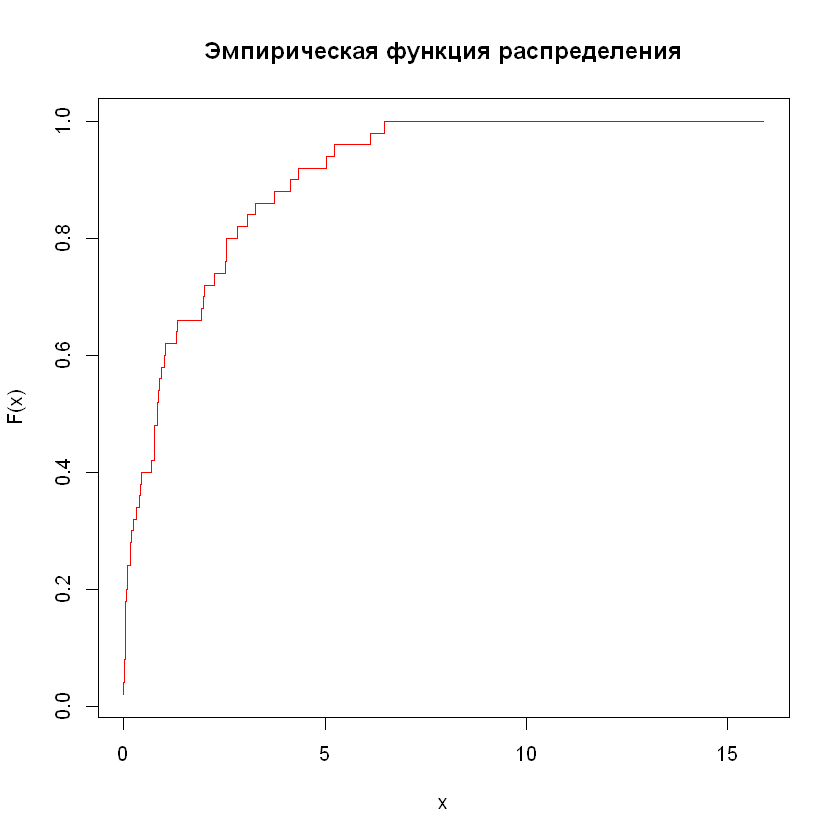

In [177]:
dataLen = length(data)
plot(sort(data), (1:dataLen)/dataLen, type="S", col="red", 
main="Эмпирическая функция распределения", xlab="x", ylab="F(x)")

Гистограмма частот:

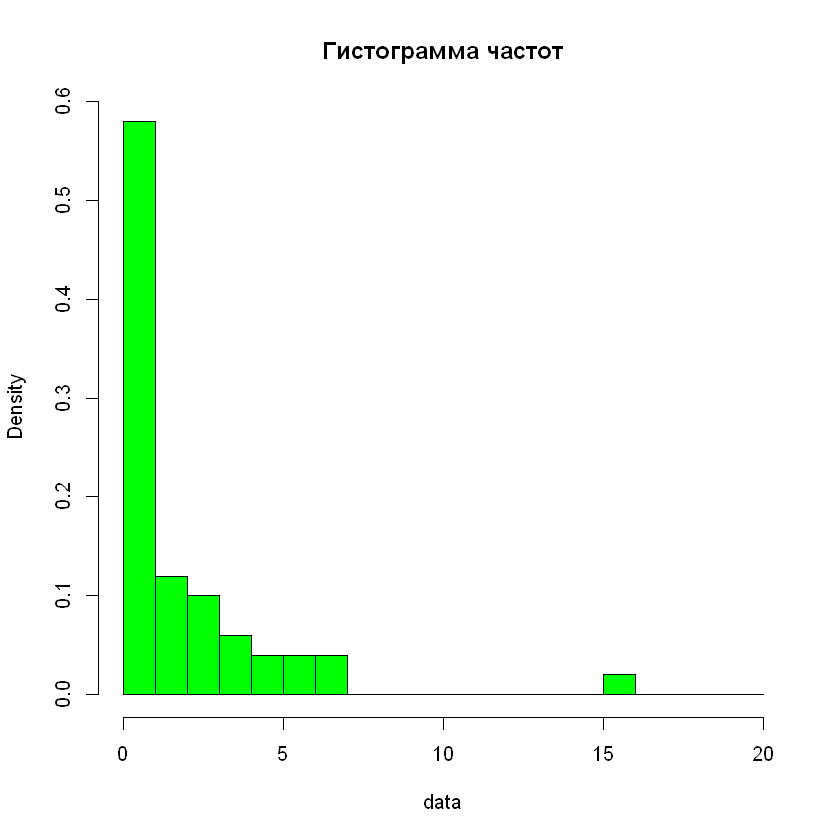

In [178]:
hist(data, breaks=0:20, main="Гистограмма частот", freq = FALSE, col = "green")

### b) Вычислить выборочные аналоги числовых характеристик (матожидание, дисперсия, медиана, ассиметрия, эксцесс, вероятности на промежутке).

In [179]:
#install.packages ("moments")
#library(moments)
print(data.frame(Матожидание = mean(data), Дисперсия = var(data), 
Медиана = median(data), Ассиметрия = skewness(data), Эксцесс = kurtosis(data)))

  Матожидание Дисперсия Медиана Ассиметрия  Эксцесс
1      1.8112  7.074827   0.845   3.279316 16.93842


$P(X \in [c, d])=P(X \in [0, 4.26]):$

In [180]:
k = 0
for (value in data){
    if(value >=c && value <=d) 
        k = k + 1
}
print(k/dataLen)

[1] 0.88


### c) В предположении, что исходные наблюдения являются выборкой из показательного распределения, построить оценку максимального правдоподобия параметра $\lambda$ а также оценку $\lambda$ по методу моментов. Найти смещение оценок.
Плотность показательного распределения: 
### $p(x) = \lambda e^{-\lambda x}$, $x \geqslant 0$

Функция правдоподобия: 
### $L(x,\lambda)=\displaystyle{\prod\limits_{i=1}^{n}p(x_i)}=\lambda^n e^{-\lambda \sum_{i=1}^{n}x_i}$
Логарифм от функции правдоподобия:
### $\displaystyle{LL(x,\lambda)=ln(\lambda)n - \lambda\sum_{i=1}^{n}X_i}$
### $\displaystyle{\frac{\partial LL}{\partial\lambda}=\frac{n}{\lambda}-\sum_{i=1}^{n}X_i=0} \Longrightarrow \frac{1}{\lambda} = \frac{1}{n}\sum_{i=1}^{n}X_i=\bar{x} \Longrightarrow \hat{\lambda}=\frac{1}{\bar x}=\frac{1}{1.8112}\approx 0,55$
По методу моментов оценим $\lambda$:
### $\displaystyle{E(\hat{\lambda})=E(\frac{1}{\bar{x}})=E(\frac{n}{\sum_{i=1}^{n}X_i})=\frac{n}{\sum_{i=1}^{n}E(x_i)}=\frac{n}{\sum_{i=1}^{n}\frac{1}{\lambda}}=\frac{n}{\frac{n}{\lambda}}=\lambda\Longrightarrow}$ оценка несмещенная
Таким образом, оценка: $\displaystyle{\hat{\lambda}=0,55}$

### d) Построить асимптотический доверительный интервал уровня значимости $\alpha_2$ для параметра $\lambda$ на базе ОМП.
Воспользуемся центральной предельной теоремой:
### $\displaystyle{\sqrt n\frac{\bar x - a}{\sigma}\longrightarrow N(0, 1)}$
При этом:
### $\displaystyle{x_1, x_2, ..., x_n \sim Exp(\lambda)}$
Из чего следует, что:
### $\displaystyle{\hat{\lambda}=\frac{1}{\bar x}},EX_i=\frac{1}{\lambda},DX_i=\frac{1}{\lambda^2}$
Тогда:
### $\displaystyle{\sqrt n\frac{\bar x - \lambda^{-1}}{\sqrt{\lambda^{-2}}}\longrightarrow N(0, 1) \Longrightarrow \sqrt n\frac{\bar x - \lambda^{-1}}{\sqrt{\bar x^2}}\longrightarrow N(0, 1) \Longrightarrow P\left(-x_\alpha \leqslant \sqrt n\frac{\bar x - \lambda^{-1}}{|\bar x|} \leqslant x_\alpha\right)\longrightarrow 1-\alpha_2}$
### где, $\displaystyle{x_\alpha: \Phi(x_\alpha)=1-\frac{\alpha_2}{2}=1-\frac{0,05}{2}=0,975}\Longrightarrow x_\alpha=\Phi^{-1}(0,975)=1.959964$

In [181]:
print(qnorm (0.975)) # Вычисление Ф^(-1)

[1] 1.959964


Тогда:
### $\displaystyle{P\left(-x_\alpha \leqslant \sqrt n\frac{\bar x - \lambda^{-1}}{\bar x} \leqslant x_\alpha\right)\longrightarrow 1-\alpha_2 \Longrightarrow P\left(\frac{1}{\bar{x}+\frac{\bar{x}}{\sqrt{n}}x_\alpha} \leqslant \lambda \leqslant \frac{1}{\bar{x}-\frac{\bar{x}}{\sqrt{n}}x_\alpha}\right)\longrightarrow 1-\alpha_2 \Longrightarrow P\left(\frac{1}{1,8112+\frac{1,8112}{\sqrt{50}}1,959964} \leqslant \lambda \leqslant \frac{1}{1,8112-\frac{1,8112}{\sqrt{50}}1,959964}\right)\longrightarrow 1-0,05}$

In [182]:
1/(1.8112+1.8112/sqrt(50)*1.959964)
1/(1.8112-1.8112/sqrt(50)*1.959964)

[1] 0.432296

[1] 0.7638426

Итого:
### $\displaystyle{P(0.432296003497849 \leqslant \lambda \leqslant 0.763842626453414)\longrightarrow 0,95}$

### e) С использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия с показательным распределением с параметром $\lambda_0$. ПРоверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором нет оснований отвергнуть данную гипотезу.
### $H_0 : F_\lambda=F_{\lambda_0}$ - функция паказательного распределения с параметром $\lambda_0$
По теореме Колмогорова:
$\phi(\overrightarrow x)= \begin{cases}
    0, & \quad K \leqslant x_\alpha \\
    1, & \quad K > x_\alpha
\end{cases}$
### $K = max|F_n(x)-F(x)|\sqrt n$
### $x_{\alpha_2}=1,959964$
Вычисление К:

In [183]:
ks_test <- ks.test(sort(data), "pexp", lambda_0)
sqrt(50)*ks_test$statistic

Warning message in ks.test(sort(data), "pexp", lambda_0):
"ties should not be present for the Kolmogorov-Smirnov test"

D 
2.879246

### $K > x_{\alpha_2} \Longrightarrow$ отвергаем гипотезу $H_0$.

### f) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с gпоказательным распределением с параметром $\lambda_0$. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет основания отвергнуть данную гипотезу.

### $H_0: \lambda = \lambda_0$

### $H_0: F=F_{\lambda_0}$ - функция показательного распределения $Exp(\lambda_0)$
### $\widetilde{H}_0: p_1 = p_{10},p_2=p_{20},...,p_r=p_{r0}$, где $p_{ri}$ - неизвестные теоретические вероятности попадиения в каждый интервал.

|Интервал|Теоретические пападания|Попадания|
|:|:|:|
|(-oo, 1]|25.3364907863714|34|
|(1, 2]|10.9770137621869|7|
|(2, 3]|6.09146280139105|5|
|(3, 4]|7.59503265005068|2|
|(4, 5]|7.59503265005068|2|
|(5, 6]|7.59503265005068|2|
|(6, +oo)|7.59503265005068|2|

Вычисления попаданий в интервалы:

In [184]:
k1 = 0
for (value in data){
    if(value <= 1) 
        k1 = k1 + 1
}
print(k1)

k2 = 0
for (value in data){
    if(value > 1 && value <= 2) 
        k2 = k2 + 1
}
print(k2)

k3 = 0
for (value in data){
    if(value > 2 && value <= 3) 
        k3 = k3 + 1
}
print(k3)

k4 = 0
for (value in data){
    if(value > 3 && value <= 4) 
        k4 = k4 + 1
}
print(k4)

k5 = 0
for (value in data){
    if(value > 4 && value <= 5) 
        k5 = k5 + 1
}
print(k5)

k6 = 0
for (value in data){
    if(value > 5 && value <= 6) 
        k6 = k6 + 1
}
print(k6)

k7 = 0
for (value in data){
    if(value > 6) 
        k7 = k7 + 1
}
print(k7)

[1] 29
[1] 6
[1] 5
[1] 3
[1] 2
[1] 2
[1] 3


Вычисления теоретических ожидаемых попаданий

In [185]:
up <- c(1,2,3,4,5,6,+Inf)
lower <- c(-Inf,1,2,3,4,5,6)
npk <- 50*(pexp(up, lambda_0) - pexp(lower, lambda_0))
counts = c(k1, k2, k3, k4, k5, k6, k7)
sum((counts - npk)^2/npk)

[1] 52.1104

Граница критической области:
### $x_{\alpha} = 12.591587243744 << \chi_2 \Rightarrow$ - основная гипотеза солгасия с показательным распределением отвергнута. Принимается альтернативная гипотеза о том, что исходные наблюдения не являются выборкой из показательного распределения с параметром $\lambda_0$

In [186]:
qchisq(1-alpha_2, 6)

[1] 12.59159

### g) Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с показательным распределением. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет основания отвергнуть данную гипотезу.

In [187]:
csq <- function(lambda_0){
    prob <- pexp(up, lambda_0) - pexp(lower, lambda_0)
    return (sum((counts-50*prob)^2/prob/50))
}
nlm(csq, mean(data))$minimum

Warning message in pexp(up, lambda_0):
"созданы NaN"Warning message in pexp(lower, lambda_0):
"созданы NaN"Warning message in nlm(csq, mean(data)):
"NA/Inf заменены максимальным положительным значением"Warning message in pexp(up, lambda_0):
"созданы NaN"Warning message in pexp(lower, lambda_0):
"созданы NaN"Warning message in nlm(csq, mean(data)):
"NA/Inf заменены максимальным положительным значением"Warning message in pexp(up, lambda_0):
"созданы NaN"Warning message in pexp(lower, lambda_0):
"созданы NaN"Warning message in nlm(csq, mean(data)):
"NA/Inf заменены максимальным положительным значением"Warning message in pexp(up, lambda_0):
"созданы NaN"Warning message in pexp(lower, lambda_0):
"созданы NaN"Warning message in nlm(csq, mean(data)):
"NA/Inf заменены максимальным положительным значением"

[1] 7.995082

### $\widetilde{X}^2=7,99508214998187$
### $df=r-d-1=7-1-1=5$
### $x_{\alpha} = 11,0704976935164 > \widetilde{X}^2 \Rightarrow$ - гипотеза о согласии с показательным распределением принимается.

Вычисление $x_{\alpha}$:

In [188]:
qchisq(1-alpha_2, 5)

[1] 11.0705

Вычисление наибольшего значения урованя значимости $\alpha_{max}$:

In [189]:
1 - pchisq(nlm(csq, mean(data))$minimum, df=5)

Warning message in pexp(up, lambda_0):
"созданы NaN"Warning message in pexp(lower, lambda_0):
"созданы NaN"Warning message in nlm(csq, mean(data)):
"NA/Inf заменены максимальным положительным значением"Warning message in pexp(up, lambda_0):
"созданы NaN"Warning message in pexp(lower, lambda_0):
"созданы NaN"Warning message in nlm(csq, mean(data)):
"NA/Inf заменены максимальным положительным значением"Warning message in pexp(up, lambda_0):
"созданы NaN"Warning message in pexp(lower, lambda_0):
"созданы NaN"Warning message in nlm(csq, mean(data)):
"NA/Inf заменены максимальным положительным значением"Warning message in pexp(up, lambda_0):
"созданы NaN"Warning message in pexp(lower, lambda_0):
"созданы NaN"Warning message in nlm(csq, mean(data)):
"NA/Inf заменены максимальным положительным значением"

[1] 0.1565069